# LIDA Demo

**Authors**: Unnati Narang, Ye Joo Park

## Overview

### What is LIDA?

> LIDA is a library for generating data visualizations and data-faithful infographics.

- [Project Website](https://microsoft.github.io/lida/)
- [GitHub Repository](https://github.com/microsoft/lida/tree/main)

We will demonstrate a basic usage of the LIDA package in this notebook.


## Setup


If you're using Google Colab, uncomment and run the line below to install the `lida` package.


In [1]:
# !pip install lida

Import the required packages.


In [2]:
from lida import Manager, TextGenerationConfig, llm

Read the OpenAI API Key from a text file and store it into the `OPENAI_API_KEY` variable.


In [3]:
OPENAI_API_KEY = open("OPENAI_API_KEY.txt", "r").read()

# another option is to directly set the OpenAI API key
# be careful not to accidently publish your API Key
# OPENAI_API_KEY = "YOUR_OPENAI_API_KEY_GOES_HERE"

## Nike and Adidas Stock Prices


### 1.1 Summarize Data, Generate Goals

Lida offers a manager class that exposes core functionality of the LIDA system. Run the code below to initialize the `Manager` with `openai` as the backend.


In [4]:
lida = Manager(text_gen=llm(provider="openai", api_key=OPENAI_API_KEY))

Each manager method takes a `textgen_config` argument which is a dictionary that can be used to configure the text generation process (with parameters for model, temperature, max_tokens, etc). One of the keys in this dictionary is use_cache. If set to True, the manager will cache the generated text associated with that method. Use for speedup and to avoid hitting API limits.

First, configure LIDA to use the `"gpt-4-turbo"` model.

Set the temperature to `0.2`. LLM temperature is a parameter that controls the level of randomness and creativity in the output of a Large Language Model (LLM). It's often set between 0 and 1, but can sometimes be higher. The lower the temperature, your model will be more deterministic and repetitive. For the purpose of this demo, we're using a low temperature to replicate the demo through multiple repetitions.


In [ ]:
textgen_config = TextGenerationConfig(
    n=1, temperature=0.2, model="gpt-4-turbo", use_cache=False
)

Build a summary.


In [6]:
summary = lida.summarize(
    "nike-adidas-stock-price-2022-2023.csv",
    summary_method="default",
    textgen_config=textgen_config,
)

Create goals.


In [7]:
goals = lida.goals(summary, n=2, textgen_config=textgen_config)

for goal in goals:
    display(goal)


### Goal 0
---
**Question:** How do the stock prices of Adidas (ADS) and Nike (NKE) compare over the period from September 2022 to August 2023?

**Visualization:** `Line chart with 'Date' on the x-axis and both 'ADS' and 'NKE' on the y-axis`

**Rationale:** Using a line chart will clearly show trends and fluctuations in the stock prices of both companies over time. Plotting both 'ADS' and 'NKE' on the same graph allows for direct comparison to see how each stock performed relative to the other on any given date.



### Goal 1
---
**Question:** What are the volatility patterns in the stock prices of Adidas and Nike throughout the year?

**Visualization:** `Time series decomposition plots for 'ADS' and 'NKE'`

**Rationale:** Time series decomposition will help in understanding the underlying patterns such as seasonality, trend, and irregular components in the stock prices. This is particularly useful to analyze how external factors or market conditions might be influencing the volatility of each stock.


In [8]:
summary = lida.summarize(
    "nike-adidas-stock-price-2022-2023.csv",
    summary_method="default",
    textgen_config=textgen_config,
)

goals = lida.goals(summary, n=2, textgen_config=textgen_config)

for goal in goals:
    display(goal)


### Goal 0
---
**Question:** How do the stock prices of Adidas (ADS) and Nike (NKE) compare over the period from September 2022 to August 2023?

**Visualization:** `Line chart with 'Date' on the x-axis and both 'ADS' and 'NKE' on the y-axis`

**Rationale:** Using a line chart to plot 'ADS' and 'NKE' stock prices against 'Date' will visually represent trends, fluctuations, and comparative performance over time. This helps in understanding how each company's stock value has changed and allows for direct comparison between the two on the same timeline.



### Goal 1
---
**Question:** What are the volatility patterns in the stock prices of Adidas and Nike throughout the year?

**Visualization:** `Two separate line charts for 'ADS' and 'NKE' with 'Date' on the x-axis and the moving standard deviation of stock prices on the y-axis, calculated over a 30-day rolling window`

**Rationale:** Plotting the moving standard deviation of 'ADS' and 'NKE' prices will show how the stock prices' volatility changes over time. This is crucial for understanding periods of high risk and stability in the stock performance, which can inform investment strategies.


### 1.2 Generate Visualizations


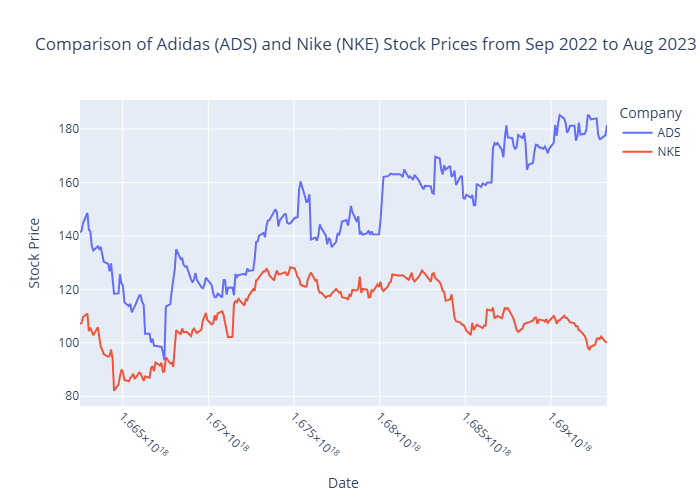

In [9]:
i = 0
library = "plotly"
charts = lida.visualize(
    summary=summary, goal=goals[i], textgen_config=textgen_config, library=library
)

display(charts[0])

### 1.3 Refine the visual using natural language


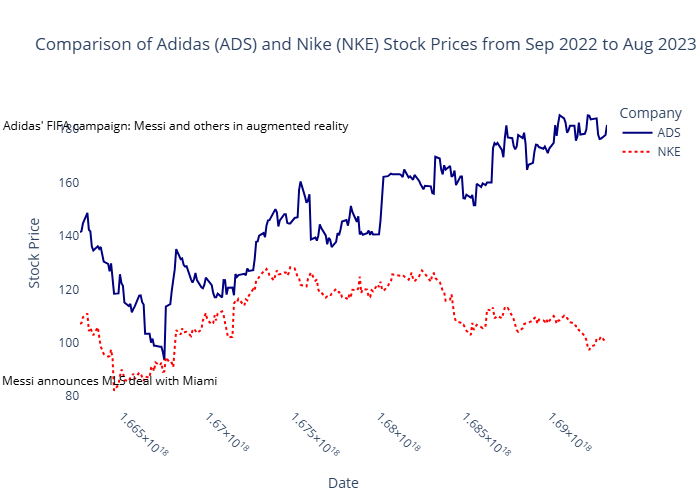

In [10]:
code = charts[0].code

instructions = [
    "use a simple_white background template",
    "get rid of gridliens",
    "change Adidas's line color to navy",
    "change Nike's line color to red",
    "change Nike's line style to dotted",
    "add a black solid vertical line on 2022-11-01",
    'add annotation on 2022-11-01 with the text "Adidas\' FIFA campaign: Messi and others in augmented reality"',
    "add a black solid vertical line on 2023-07-15",
    'add annotation on 2022-07-15 with the text "Messi announces MLS deal with Miami"',
]

edited_charts = lida.edit(
    code=code,
    summary=summary,
    instructions=instructions,
    library=library,
    textgen_config=textgen_config,
)

edited_charts[0]

### 1.4 Explain the underlying code of the edited chart


In [11]:
code = edited_charts[0].code

explanations = lida.explain(code=code, library=library, textgen_config=textgen_config)

for row in explanations[0]:
    print(row["section"], " ** ", row["explanation"])

accessibility  **  The chart is a line graph comparing the stock prices of Adidas (ADS) and Nike (NKE) from September 2022 to August 2023. It uses navy color for Adidas and a red dotted line for Nike, enhancing visual distinction. The x-axis labels are rotated 45 degrees for better readability, and the chart background is white with no grid lines for a clean appearance. The chart includes annotations for significant events, providing contextual insights directly on the visualization.
transformation  **  This section of the code transforms the 'Date' column to datetime format, handling any errors by coercing invalid entries to NaT (Not a Time). It then filters the data to exclude rows where 'Date' is NaT, ensuring that the visualization only includes entries with valid dates.
visualization  **  This section creates the line chart using Plotly Express, setting 'Date' as the x-axis and stock prices of 'ADS' and 'NKE' as y-axes. It customizes the appearance of each company's line and adjus

### 1.5 Create a visualization via a "User Query"


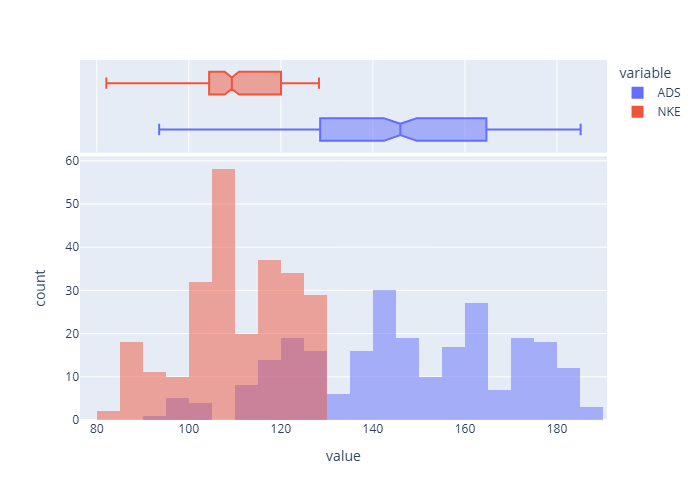

In [12]:
user_query = (
    "What are the statistical distributions of the stock prices of Nike and Adidas?"
)

charts = lida.visualize(
    summary=summary, goal=user_query, textgen_config=textgen_config, library="plotly"
)

charts[0]

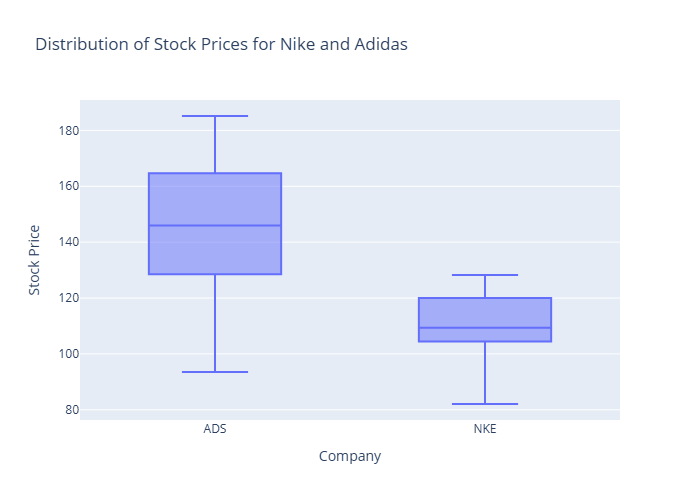

In [13]:
user_query = "What are the statistical distributions of the stock prices of Nike and Adidas? \
    Use a box plot to display the distributions."

charts = lida.visualize(
    summary=summary,
    goal=user_query,
    textgen_config=textgen_config,
    library="plotly",
)

charts[0]